### Generating Plots for Paper

In [1]:
#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd
import gc
import pickle
import matplotlib.ticker as ticker

In [16]:
data1 = dg.load_data('mucols2numu.txt', n_events = 1e5, direc = 'GENANA') #this is my variable for the directory in which my .txt files are.
data2 = dg.load_data('mucols2nue.txt', n_events = 1e5, direc = 'GENANA')
data = pd.concat([data1, data2], axis = 0)
data11 = dg.load_data('mokhovnumu.txt', n_events = 1e5, direc = 'GENANA') #this is my variable for the directory in which my .txt files are.
data21 = dg.load_data('mokhovnue.txt', n_events = 1e5, direc = 'GENANA')
datam = pd.concat([data11, data21], axis = 0)
datat = dg.load_data('muTs.txt', n_events = 1e5, direc = 'GENANA') 

Loading generated data for a IMCC-II experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!
Loading generated data for a IMCC-II experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!
Loading generated data for a μTRISTAN (s) experiment;
It includes interactions from ν_e, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!


In [17]:
mus_mucol = (data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')])
es_mucol = (data[(data['Name'] == 'e-') | (data['Name'] == 'e+')])

mus_mokhov = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])
es_mokhov = (datam[(datam['Name'] == 'e-') | (datam['Name'] == 'e+')])

mus_muT = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])
es_muT = (datat[(datat['Name'] == 'e-') | (datat['Name'] == 'e+')])

In [4]:
dfs = [mus_mucol, es_mucol, mus_mokhov, es_mokhov, mus_muT, es_muT]
theta = [None, None, None, None, None, None]
pT = [None, None, None, None, None, None]
for i,el in enumerate(dfs):
    theta[i] = np.arccos(el['pz'] / np.sqrt(el['px']**2 + el['py']**2 + el['pz']**2)) * 180/np.pi
    pT[i] = np.sqrt(el['py']**2 + el['px']**2)   

In [5]:
with open('gen_data/mutristan.pkl', 'rb') as file:
    muTs = pickle.load(file)
with open('gen_data/mucol.pkl', 'rb') as file:
    mucol = pickle.load(file)
with open('gen_data/mokhov.pkl', 'rb') as file:
    mokhov = pickle.load(file)

In [31]:
mucol.get_face_counts()

Event Distribution:
 +------------------+-------------------+------------------------+-------------------------+--------------------+--------------+
|  Detector Parts  | ν_e events (left) | anti ν_μ events (left) | anti ν_e events (right) | ν_μ events (right) | Total Events |
+------------------+-------------------+------------------------+-------------------------+--------------------+--------------+
|  muon_detector   |     2.452e+10     |       1.493e+10        |        1.269e+10        |     2.873e+10      |  8.088e+10   |
| solenoid_borders |     5.628e+08     |       3.395e+08        |        2.914e+08        |     6.531e+08      |  1.847e+09   |
|   solenoid_mid   |     8.360e+08     |       5.066e+08        |        4.329e+08        |     9.744e+08      |  2.750e+09   |
|       hcal       |     1.202e+10     |       7.302e+09        |        6.221e+09        |     1.405e+10      |  3.959e+10   |
|       ecal       |     1.483e+09     |       9.030e+08        |        7.676e+08 

In [6]:
_,_,_,w_muTs,times_muTs,E_muTs,cost_muTs = muTs.get_data()
_,_,_,w_mucol,times_mucol,E_mucol,cost_mucol = mucol.get_data()
_,_,_,w_mokhov,times_mokhov,E_mokhov,cost_mokhov = mokhov.get_data()
pT_muTs = E_muTs * np.sqrt(1 - cost_muTs**2)
pT_mokhov = E_mokhov * np.sqrt(1 - cost_mokhov**2)
pT_mucol = E_mucol * np.sqrt(1 - cost_mucol**2)
_, _, _, wms, timesms, _, _ = mucol.get_data(sec = 'muon_detector')
_, _, _, wno, timesno, _, _ = mucol.get_data(sec = 'nozzles')
_, _, _, whc, timeshc, _, _ = mucol.get_data(sec = 'hcal')
_, _, _, wec, timesec, _, _ = mucol.get_data(sec = 'ecal')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


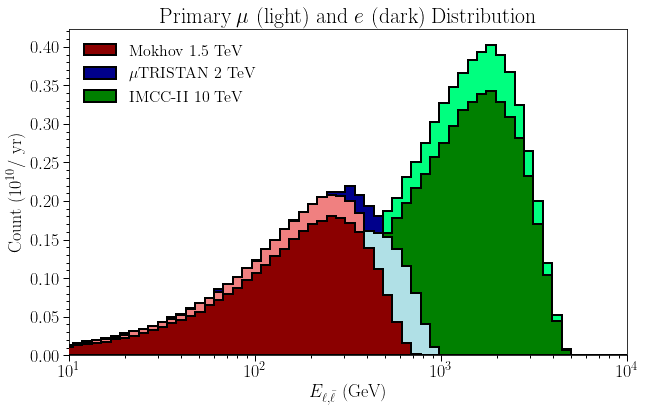

In [7]:
plt.style.use('./paper_style.txt')
plt.figure(figsize = (10,6))
bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
plt.hist(es_mokhov['E'], weights = es_mokhov['w']/1e10, bins = bins, histtype = 'stepfilled', label = 'Mokhov 1.5 TeV', color = 'darkred', zorder = 15, edgecolor = 'black')
plt.hist(mus_mokhov['E'], weights = mus_mokhov['w']/1e10, bins = bins, histtype = 'stepfilled', color = 'lightcoral', zorder = 10, edgecolor = 'black')

plt.hist(es_muT['E'], weights = es_muT['w']/1e10, bins = bins, histtype = 'stepfilled', label = r'$\mu$TRISTAN 2 TeV', color = 'darkblue', zorder = 9, edgecolor = 'black')
plt.hist(mus_muT['E'], weights = mus_muT['w']/1e10, bins = bins, histtype = 'stepfilled', color = 'powderblue', zorder = 10, edgecolor = 'black')

plt.hist(es_mucol['E'], weights = es_mucol['w']/1e10, bins = bins, histtype = 'stepfilled', label = 'IMCC-II 10 TeV', color = 'green', zorder = 2, edgecolor = 'black')
plt.hist(mus_mucol['E'], weights = mus_mucol['w']/1e10, bins = bins, histtype = 'stepfilled', color = 'springgreen', zorder = 1, edgecolor = 'black')

#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
#plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))  # Adjust the interval as needed
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.08))

plt.xlabel(r'$E_{\ell,\bar{\ell}}$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.xscale('log')
plt.xlim(10,10**4)
plt.title(r'Primary $\mu$ (light) and $e$ (dark) Distribution')
plt.legend(loc = 'upper left', fontsize = 16)
plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

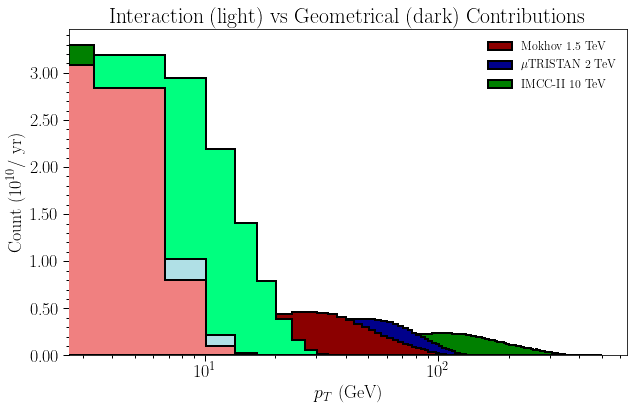

In [12]:
plt.figure(figsize = (10,6))
bins = np.linspace(0, 500, 150)
plt.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'stepfilled', color = 'lightcoral', zorder = 10, edgecolor = 'black')
plt.hist(pT_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', label = 'Mokhov 1.5 TeV', color = 'darkred', zorder = 3, edgecolor = 'black')
plt.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'stepfilled', color = 'powderblue', zorder = 9, edgecolor = 'black')
plt.hist(pT_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', label = r'$\mu$TRISTAN 2 TeV', color = 'darkblue', zorder = 2, edgecolor = 'black')
plt.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'stepfilled',  color = 'springgreen', zorder = 8, edgecolor = 'black')
plt.hist(pT_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', label = 'IMCC-II 10 TeV', color = 'green', zorder = 1, edgecolor = 'black')

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(70))  # Adjust the interval as needed
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.08))

plt.xlabel(r'$p_T$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.legend(loc = 'upper right')
#plt.yscale('log')
plt.xscale('log')
plt.title(r'Interaction (light) vs Geometrical (dark) Contributions')
plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

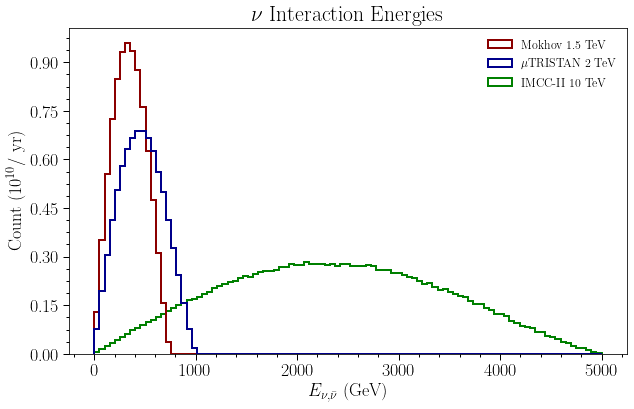

In [9]:
plt.figure(figsize = (10,6))
bins = np.linspace(0,5e3, 100)
plt.hist(E_mokhov, weights  = w_mokhov/1e10, histtype = 'step', color = 'darkred', label = r'Mokhov 1.5 TeV', bins = bins, zorder = 2)
plt.hist(E_muTs, weights  = w_muTs/1e10, histtype = 'step', color = 'darkblue', label = r'$\mu$TRISTAN 2 TeV', bins = bins, zorder = 3)
plt.hist(E_mucol, weights  = w_mucol/1e10, histtype = 'step', color = 'green', label = r'IMCC-II 10 TeV', bins = bins, zorder = 1)

#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(70))  # Adjust the interval as needed
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.15))

plt.xlabel(r'$E_{\nu, \bar{\nu}}$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.legend(loc = 'upper right')
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'$\nu$ Interaction Energies')
plt.savefig('plots_Luc/posterplots/nu_e.jpg', bbox_inches = 'tight', dpi = 500)

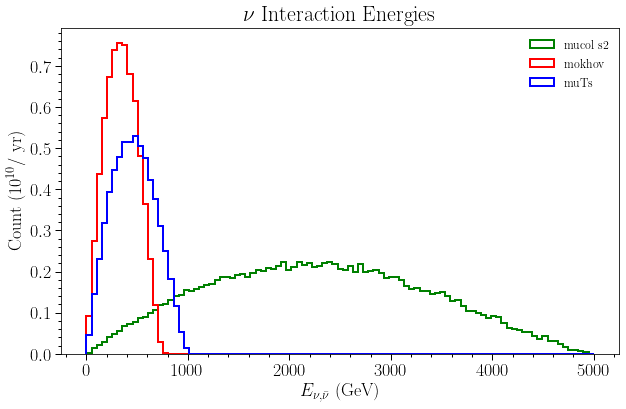

In [21]:
plt.figure(figsize = (10,6))
bins = np.linspace(0,5e3, 100)
plt.hist(data['nu_E'], weights = data['w']/1e10, label = 'mucol s2', bins = bins, color = 'green', histtype = 'step')
plt.hist(datam['nu_E'], weights = datam['w']/1e10, label = 'mokhov', bins = bins, color = 'red', histtype = 'step')
plt.hist(datat['nu_E'], weights = datat['w']/1e10, label = 'muTs', bins = bins, color = 'blue', histtype = 'step')
plt.xlabel(r'$E_{\nu, \bar{\nu}}$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.legend(loc = 'upper right')
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'$\nu$ Interaction Energies')
plt.savefig('plots_Luc/posterplots/nu_e.jpg', bbox_inches = 'tight', dpi = 500)

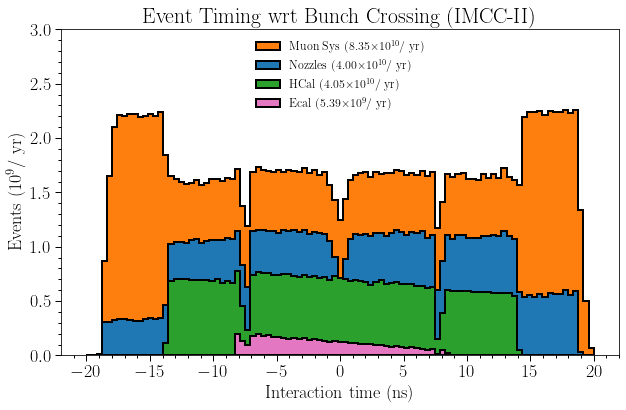

In [18]:
plt.figure(figsize = (10,6))
bins = np.linspace(-20, 20, 100)
data = [timesms*1e9, timeshc*1e9, timesno*1e9, timesec*1e9]
weights = [wms/1e9, whc/1e9, wno/1e9, wec/1e9]
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:pink']
labels = [r'Muon Sys (8.35$\times10^{10}$/ yr)', r'HCal (4.05$\times10^{10}$/ yr)', r'Nozzles (4.00$\times10^{10}$/ yr)', r'Ecal (5.39$\times10^{9}$/ yr)']

order = [3,1,2,0]
data = [data[order[0]], data[order[1]], data[order[2]], data[order[3]]]
weights = [weights[order[0]], weights[order[1]], weights[order[2]], weights[order[3]]]
colors = [colors[order[0]], colors[order[1]], colors[order[2]], colors[order[3]]]
labels = [labels[order[0]], labels[order[1]], labels[order[2]], labels[order[3]]]

plt.hist(data, weights = weights, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = colors, label = labels, stacked = True)

plt.legend(loc = 'upper center')
plt.ylabel(r'Events ($10^{9}$/ yr)')
plt.xlabel('Interaction time (ns)')
plt.ylim(0,3)
plt.title(r'Event Timing wrt Bunch Crossing (IMCC-II)')
plt.savefig('plots_Luc/posterplots/nu_t.jpg', bbox_inches = 'tight', dpi = 500)

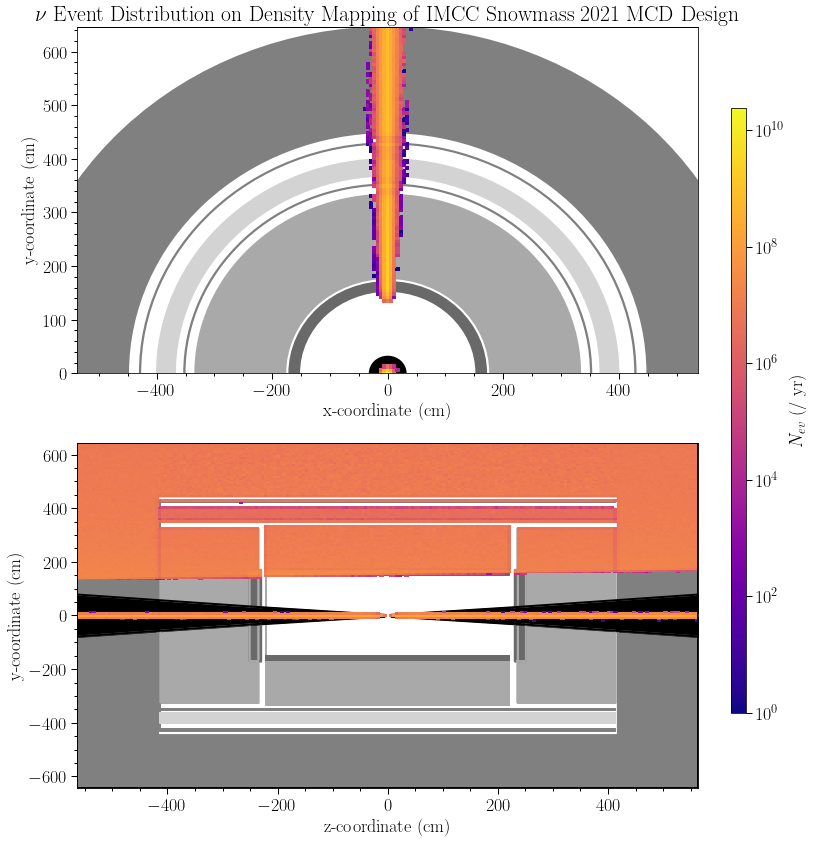

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(2, 1, figsize = (11,14))
hist1 = mucol.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, cmin = None)
hist2 = mucol.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, cmin = None)

vmin=1
vmax=max(hist1[0].max(), hist2[0].max())

axs[0].clear()
axs[1].clear()
hist1 = mucol.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, vmin = vmin, vmax = vmax, cmin = 1, title = False)
hist2 = mucol.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, vmin = vmin, vmax = vmax, cmin = 1)

# Add a colorbar that spans both subplots
axs[0].set_title(r'$\nu$ Event Distribution on Density Mapping of IMCC Snowmass 2021 MCD Design')
cbar_ax = fig.add_subplot(111)  # Create a new subplot for the colorbar
cbar = fig.colorbar(hist1[3], ax=[axs[0], axs[1]], cax=cbar_ax)  # Create the colorbar
plt.subplots_adjust(hspace=0.2)
cbar.set_label(r'$N_{ev}$ (/ yr)', fontsize = 18)
# Adjust the position of the colorbar to span both subplots
fig.subplots_adjust(right=0.909090909)  # Adjust the right side to make space for the colorbar
cbar_ax.set_position([0.95, 0.2, 0.02, 0.6])  # [left, bottom, width, height]
plt.savefig('plots_Luc/posterplots/nu_d.jpg', bbox_inches = 'tight', dpi = 500)

In [26]:
sim = dg.SimulateDetector(param = 'mutristan s', N_evals = 1e6)
sd1 = sim.run(collision = 'mu+mu+', Lss = 75)
sim = dg.SimulateDetector(param = 'mokhov', N_evals = 1e6)
sd = sim.run(collision = 'mu+mu-', Lss = 50)
sim = dg.SimulateDetector(param = 'mucol s2', N_evals = 1e6)
sd2 = sim.run(collision = 'mu+mu-', Lss = 100)

Succesfully simulated decays:
μTRISTAN (s) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 39.3 s.
47747.71346819634
Successfully simulated neutrino event rates within Det v2:
μTRISTAN (s) (μ+μ+) at L = 75.00 m.
Total count: 8.52e+10 events; took 38.4 s (numba pre-compilation needed).

Succesfully simulated decays:
Mohkov et al. (Fermilab) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 39.6 s.
43449.73919990736
Successfully simulated neutrino event rates within Det v2:
Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m.
Total count: 8.88e+10 events; took 26.1 s.

Succesfully simulated decays:
IMCC-II parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 39.7 s.
159155.20500991828
Successfully simulated neutrino event rates within Det v2:
IMCC-II (μ+μ-) at L = 100.00 m.
Total count: 1.68e+11 events; took 24.1 s.



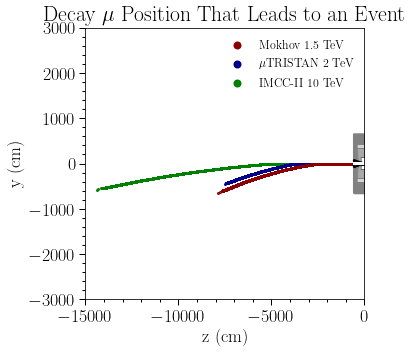

<Figure size 360x216 with 0 Axes>

In [32]:
fig, ax = plt.subplots()
plt.figure(figsize = (5,3))
ax.scatter((sd2.sims[0]).dec_pos[:,:,2], (sd2.sims[0]).dec_pos[:,:,1], s = 1, color = 'green')
ax.scatter((sd1.sims[0]).dec_pos[:,:,2], (sd1.sims[0]).dec_pos[:,:,1], s = 1,  color = 'darkblue')
ax.scatter((sd.sims[0]).dec_pos[:,:,2], (sd.sims[0]).dec_pos[:,:,1], s = 1, color = 'darkred')
ax.scatter(1000,1000, color = 'darkred', label = r'Mokhov 1.5 TeV')
ax.scatter(1000,1000, color = 'darkblue', label = r'$\mu$TRISTAN 2 TeV')
ax.scatter(1000,1000, color = 'green', label = r'IMCC-II 10 TeV')
dg.plot_det('det_v2', ax = ax)
ax.set_ylim(-3000,3000)
ax.set_xlim(-15000, 0)
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')
ax.legend()
ax.set_title(r'Decay $\mu$ Position That Leads to an Event')
plt.savefig('plots_Luc/posterplots/mu_p.jpg', bbox_inches = 'tight', dpi = 500)

In [65]:
from scipy.optimize import curve_fit
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

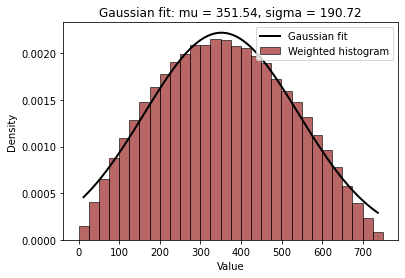

In [66]:
data = np.array(E_mokhov)
weights = np.array(w_mokhov)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='darkred', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend()

plt.show()


351.5370793110643 190.7226917976184


(10, 100000)

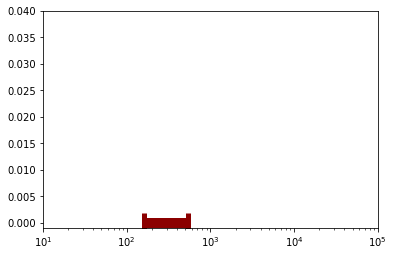

In [67]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkred', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

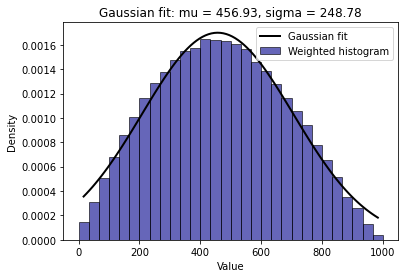

In [68]:
data = np.array(E_muTs)
weights = np.array(w_muTs)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='darkblue', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend()

plt.show()


456.9308765237521 248.78380552194864


(10, 100000)

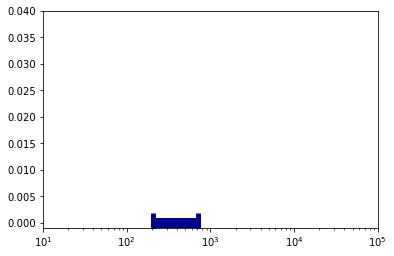

In [70]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkblue', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

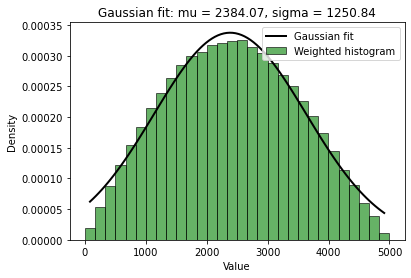

In [71]:
data = np.array(E_mucol)
weights = np.array(w_mucol)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='green', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend()

plt.show()


2384.0726979412093 1250.8387409969005


(10, 100000)

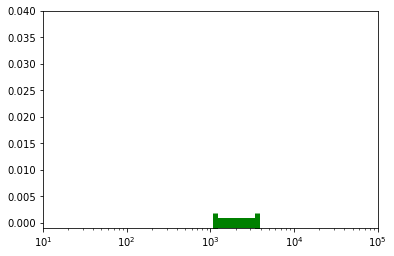

In [72]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'green', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

In [2]:
#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd
import gc
import pickle
import matplotlib.ticker as ticker

In [3]:
sim = dg.SimulateDetector(param = 'mokhov', N_evals = 1e5)
sd1 = sim.run(collision = 'mu+mu-', Lss = 50)

Succesfully simulated decays:
Mohkov et al. (Fermilab) parameter set with 1.000e+05 evaluations .
1.876e+05 MC generations; took 4.29 s.
Successfully simulated neutrino event rates within Det v2:
Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m.
Total count: 8.77e+10 events; took 17.3 s (numba pre-compilation needed).



In [4]:
comps = ['MD', 'SM', 'SB', 'HC', 'EC', 'NO']
parts = ['nue',  'numubar']
for p in parts:
    for c in comps:
        sd1.get_GENIE_flux(c, p)

Data has been written to fluxes/mokhov_MD_nue.data
Data has been written to fluxes/mokhov_SM_nue.data
Data has been written to fluxes/mokhov_SB_nue.data
Data has been written to fluxes/mokhov_HC_nue.data
Data has been written to fluxes/mokhov_EC_nue.data
Data has been written to fluxes/mokhov_NO_nue.data
Data has been written to fluxes/mokhov_MD_numubar.data
Data has been written to fluxes/mokhov_SM_numubar.data
Data has been written to fluxes/mokhov_SB_numubar.data
Data has been written to fluxes/mokhov_HC_numubar.data
Data has been written to fluxes/mokhov_EC_numubar.data
Data has been written to fluxes/mokhov_NO_numubar.data


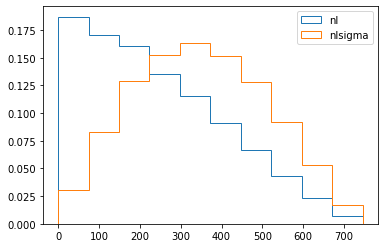

In [29]:
_,_,_, wnl, _,Enl,_ = sd1.get_data(genie = True)
_,_,_, w, _,E,_ = sd1.get_data(genie = False)
plt.hist(Enl, weights = wnl/np.sum(wnl), label = 'nl', histtype = 'step')
plt.hist(E, weights = w/np.sum(w), label = 'nlsigma', histtype = 'step')
plt.legend()

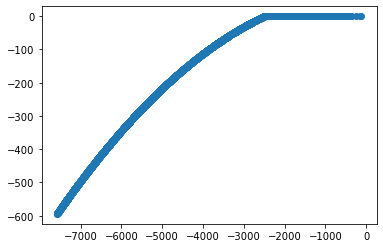

In [20]:
plt.scatter(sd1.sims[2].dec_pos[:,0,2], sd1.sims[2].dec_pos[:,0,1])

In [13]:
1.7e11/3e4/1.2e7

0.47222222222222227

In [4]:
gc.collect()

61236

In [39]:
with open('gen_data/mutristan.pkl', 'rb') as file:
    muTs = pickle.load(file)
with open('gen_data/mucol.pkl', 'rb') as file:
    mucol = pickle.load(file)
with open('gen_data/mokhov.pkl', 'rb') as file:
    mokhov = pickle.load(file)
    
comps = ['muon_detector', 'solenoid_borders', 'solenoid_mid', 'hcal', 'ecal', 'nozzles']
parts = ['nue',  'numubar', 'nuebar', 'numu']
for p in parts:
    for c in comps:
        print(c)
        mucol.get_GENIE_flux(c, p)
        mokhov.get_GENIE_flux(c,p)

parts = ['nue',  'numubar']
for p in parts:
    for c in comps:
        muTs.get_GENIE_flux(c, p)

muon_detector
Data has been written to fluxes/mucols2_MD_nue.data
Data has been written to fluxes/mokhov_MD_nue.data
solenoid_borders
Data has been written to fluxes/mucols2_SB_nue.data
Data has been written to fluxes/mokhov_SB_nue.data
solenoid_mid
Data has been written to fluxes/mucols2_SM_nue.data
Data has been written to fluxes/mokhov_SM_nue.data
hcal
Data has been written to fluxes/mucols2_HC_nue.data
Data has been written to fluxes/mokhov_HC_nue.data
ecal
Data has been written to fluxes/mucols2_EC_nue.data
Data has been written to fluxes/mokhov_EC_nue.data
nozzles
Data has been written to fluxes/mucols2_NO_nue.data
Data has been written to fluxes/mokhov_NO_nue.data
muon_detector
Data has been written to fluxes/mucols2_MD_numubar.data
Data has been written to fluxes/mokhov_MD_numubar.data
solenoid_borders
Data has been written to fluxes/mucols2_SB_numubar.data
Data has been written to fluxes/mokhov_SB_numubar.data
solenoid_mid
Data has been written to fluxes/mucols2_SM_numubar.dat

In [9]:
sd1.get_face_counts()

Event Distribution:
 +------------------+-------------------+------------------------+-------------------------+--------------------+--------------+
|  Detector Parts  | ν_e events (left) | anti ν_μ events (left) | anti ν_e events (right) | ν_μ events (right) | Total Events |
+------------------+-------------------+------------------------+-------------------------+--------------------+--------------+
|  muon_detector   |     2.457e+10     |       1.497e+10        |        1.497e+10        |     2.457e+10      |  7.908e+10   |
| solenoid_borders |     5.629e+08     |       3.410e+08        |        3.410e+08        |     5.629e+08      |  1.808e+09   |
|   solenoid_mid   |     8.455e+08     |       5.138e+08        |        5.138e+08        |     8.455e+08      |  2.719e+09   |
|       hcal       |     1.205e+10     |       7.341e+09        |        7.341e+09        |     1.205e+10      |  3.878e+10   |
|       ecal       |     1.512e+09     |       9.331e+08        |        9.331e+08 

(array([0.02823319, 0.0800858 , 0.1240157 , 0.15360125, 0.16281696,
        0.15616427, 0.13213488, 0.09508182, 0.05289768, 0.01496844]),
 array([1.04100064e-01, 4.99430510e+02, 9.98756919e+02, 1.49808333e+03,
        1.99740974e+03, 2.49673615e+03, 2.99606256e+03, 3.49538897e+03,
        3.99471538e+03, 4.49404179e+03, 4.99336820e+03]),
 [<matplotlib.patches.Polygon at 0x14f4148088e0>])

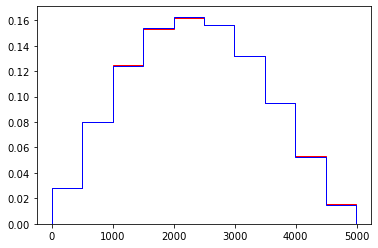

In [8]:
_,_,_,wnl,_,Enl,_ = sd1.get_data(genie = 1)
_,_,_,w,_,E,_ = sd1.get_data(genie = 0)
plt.hist(Enl, weights = wnl,color = 'red', histtype = 'step')
plt.hist(E, weights = w /np.sum(w), color = 'blue', histtype = 'step')

In [14]:
comps = ['MD', 'SM', 'SB', 'HC', 'EC', 'NO']
parts = ['nue',  'numubar']
for p in parts:
    for c in comps:
        sd1.get_GENIE_flux(c, p)

Data has been written to fluxes/muTs_MD_nue.data
Data has been written to fluxes/muTs_SM_nue.data
Data has been written to fluxes/muTs_SB_nue.data
Data has been written to fluxes/muTs_HC_nue.data
Data has been written to fluxes/muTs_EC_nue.data
Data has been written to fluxes/muTs_NO_nue.data
Data has been written to fluxes/muTs_MD_numubar.data
Data has been written to fluxes/muTs_SM_numubar.data
Data has been written to fluxes/muTs_SB_numubar.data
Data has been written to fluxes/muTs_HC_numubar.data
Data has been written to fluxes/muTs_EC_numubar.data
Data has been written to fluxes/muTs_NO_numubar.data


In [3]:
with open('gen_data/mucol.pkl', 'rb') as file:
    sd1 = pickle.load(file)

In [38]:
sd1.sims[0].nl

array([3.84942940e+27, 6.45484619e+27, 2.76558935e+26, ...,
       1.84587318e+26, 8.81340925e+24, 6.97466154e+26])

(array([0.02953994, 0.08442329, 0.13437138, 0.17794593, 0.16224109,
        0.14673061, 0.11933052, 0.09491994, 0.04159201, 0.00890529]),
 array([1.65538137e-01, 9.65809278e+01, 1.92996318e+02, 2.89411707e+02,
        3.85827097e+02, 4.82242487e+02, 5.78657876e+02, 6.75073266e+02,
        7.71488656e+02, 8.67904045e+02, 9.64319435e+02]),
 [<matplotlib.patches.Polygon at 0x1525eae8a220>])

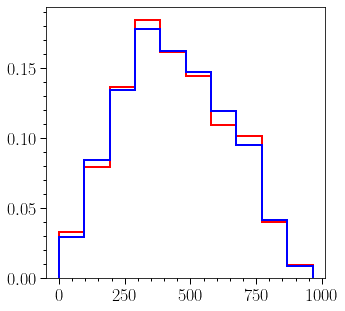

In [44]:
plt.hist(sd1.sims[0].E, weights = sd1.sims[0].w  * sd1.sims[0].nl/(np.sum(sd1.sims[0].nl*sd1.sims[0].w)),color = 'red', histtype = 'step')
plt.hist(sd1.sims[0].E, weights = sd1.sims[0].w /np.sum(sd1.sims[0].w), color = 'blue', histtype = 'step')

In [43]:
np.sum(sd1.sims[0].nl/(np.sum(sd1.sims[0].nl)))

1.0

In [47]:
sd1.get_GENIE_flux('MD', 'numubar')

Data has been written to fluxes/muTs_MD_numubar


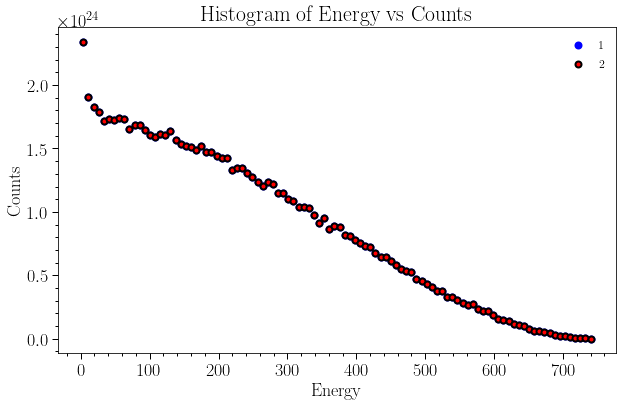

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# File path to your data
file_path = 'fluxes/mokhov_MD_nue.data'

# Load the data from the text file
data = np.loadtxt(file_path)

# Separate the columns into energy and counts
energy = data[:, 0]
counts = data[:, 1]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.scatter(energy, counts, label = '1', color = 'blue')

file_path = 'fluxes/mokhov_NO_nue.data'

# Load the data from the text file
data2 = np.loadtxt(file_path)

# Separate the columns into energy and counts
energy1 = data2[:, 0]
counts1 = data2[:, 1]

# Create the histogram
plt.scatter(energy1, counts1, edgecolor='black', label = '2', color = 'red')
# Add labels and title
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.title('Histogram of Energy vs Counts')
plt.legend()

# Display the plot
plt.show()


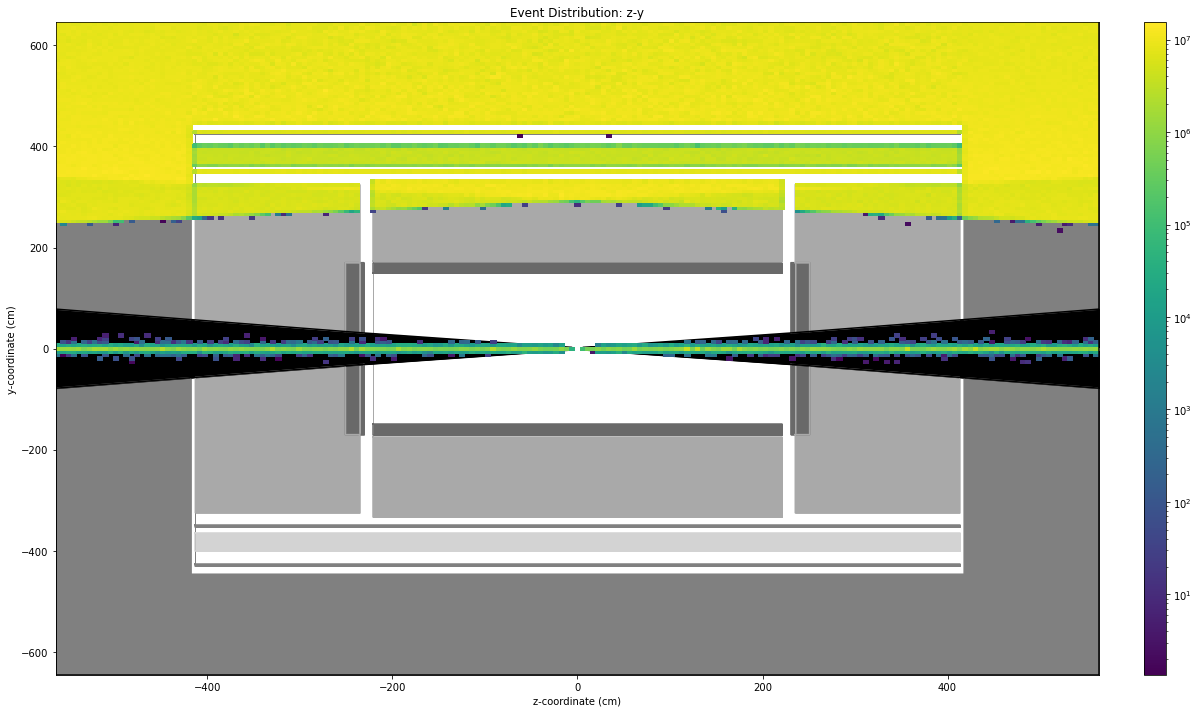

In [3]:
muTs.plot()

In [4]:
muTs.get_face_counts()

Event Distribution:
 +------------------+-------------------+------------------------+--------------------+-------------------------+--------------+
|  Detector Parts  | ν_e events (left) | anti ν_μ events (left) | ν_e events (right) | anti ν_μ events (right) | Total Events |
+------------------+-------------------+------------------------+--------------------+-------------------------+--------------+
|  muon_detector   |     2.194e+10     |       1.283e+10        |     2.206e+10      |        1.293e+10        |  6.976e+10   |
| solenoid_borders |     6.593e+08     |       3.852e+08        |     6.608e+08      |        3.887e+08        |  2.094e+09   |
|   solenoid_mid   |     9.765e+08     |       5.718e+08        |     9.751e+08      |        5.770e+08        |  3.100e+09   |
|       hcal       |     2.591e+09     |       1.505e+09        |     2.581e+09      |        1.515e+09        |  8.192e+09   |
|       ecal       |     0.000e+00     |       0.000e+00        |     5.249e-03    

In [5]:
vars(muTs)

{'param': 'mutristan s',
 'N_evals': 10000000.0,
 'collision': 'mu+mu+',
 'L': 75,
 'ntimes': 6,
 'parts': ['nue', 'numubar', 'nue', 'numubar'],
 'Geometry': 'det_v2',
 'comps': ['muon_detector',
  'solenoid_borders',
  'solenoid_mid',
  'hcal',
  'ecal',
  'nozzles'],
 'zending': 563.8,
 'rmax': 645.0,
 'sims': [<nuflux.detgeo.SimNeutrinos at 0x154c24eabfd0>,
 'tc': 83338878604.2622,
 'name': 'μTRISTAN (s)'}